In [36]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2012-1-1', end='2022-10-31')['Adj Close']
data

,PG
Date,
2012-01-03,48.218838
2012-01-04,48.197201
2012-01-05,47.995171
2012-01-06,47.879715
2012-01-09,48.081741
...,...
2022-10-25,130.860001
2022-10-26,131.779999
2022-10-27,131.880005


In [38]:
log_returns = np.log(data/data.shift(1))
log_returns

,PG
Date,
2012-01-03,NaN
2012-01-04,-0.000449
2012-01-05,-0.004201
2012-01-06,-0.002408
2012-01-09,0.004211
...,...
2022-10-25,0.011452
2022-10-26,0.007006
2022-10-27,0.000759



$$
{\LARGE
S_t = S_
{t - 1} \mathbin
{\cdot} e ^ {((r - \frac{1}{2} \cdot stdev ^ 2)
                  \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}}
$$


In [39]:
r = 0.0381

In [40]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.178691
dtype: float64

In [41]:
type(stdev)

pandas.core.series.Series

In [42]:
stdev = stdev.values
stdev

array([0.17869078])

In [43]:
T = 1.0
t_intervals = 250               # Trading Days
delta_t = T / t_intervals
iterations = 10000

In [44]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

$$
{\LARGE
S_t = S_
{t - 1} \mathbin
{\cdot} e ^ {((r - \frac{1}{2} \cdot stdev ^ 2)
                  \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}}
$$

In [45]:
for t in range(1, t_intervals + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [46]:
S

array([[134.66999817, 134.66999817, 134.66999817, ..., 134.66999817,
        134.66999817, 134.66999817],
       [136.73911377, 134.29235632, 133.90277535, ..., 134.8929337 ,
        138.05254596, 133.46235794],
       [138.10102295, 135.33612637, 134.4221298 , ..., 136.1727875 ,
        135.97648727, 133.23055234],
       ...,
       [105.55871099, 149.67150842, 127.39558571, ..., 149.44468989,
        165.18640299, 110.12352074],
       [104.4494867 , 150.29521816, 127.93796467, ..., 145.43609613,
        166.06305804, 110.13354837],
       [104.64305637, 152.19892872, 129.07614441, ..., 144.85905684,
        165.62597762, 109.89662769]])

In [47]:
S.shape

(251, 10000)

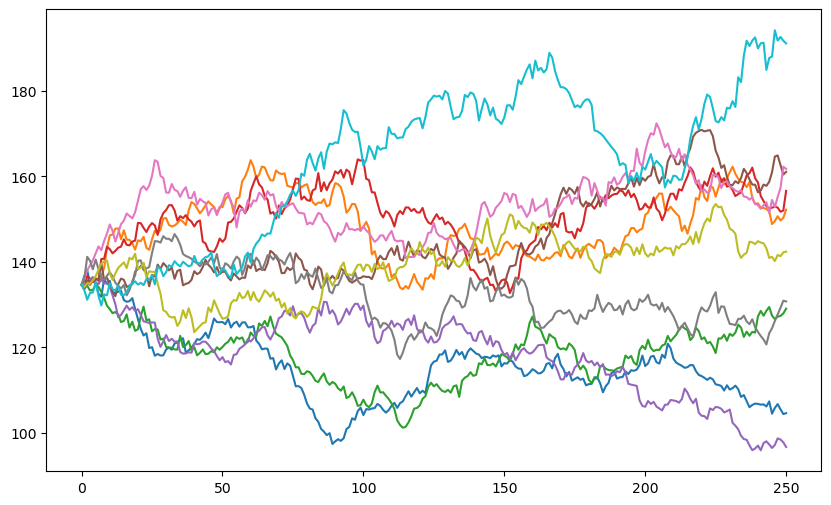

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);            # Plot first 10 columns

In [52]:
p = np.maximum(S[-1] - 110, 0)
p

array([ 0.        , 42.19892872, 19.07614441, ..., 34.85905684,
       55.62597762,  0.        ])

In [53]:
p.shape

(10000,)

In [54]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

29.754656696077237